In [1]:
import pandas as pd

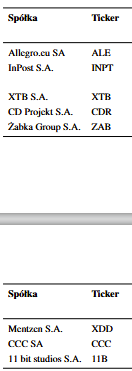

In [ ]:
Allegro: 37.52, 'free float': 62.48
XTB:    49.99, 'free float': 64.22
CD Projekt , 'free float': 59.42
InPost: 'free float': 47.77
Żabka Group, 'free float': 46.53
Mentzen 'free float': 34.93
CCC 'free float': 46.49
11bit Studios, 'free float': 47.01


In [2]:
all_data = pd.read_csv(r'TrainingData\FINAL_TWEET_DATA.csv')

In [4]:
all_data.head()

,Unnamed: 0,id,created_at,user_name,user_id,text,lang,in_reply_to,is_quote_status,quote_id,...,hashtags,urls,is_translatable,has_card,thumbnail_title,thumbnail_url,company,timestamp,agent,stock_company
0,0,1666209965004972056,2023-06-07 00:26:26+02:00,Papużka 🦜,1652543071,Siedziałam dziś 3 godziny i wystawiałam rzeczy...,pl,NaN,0,NaN,...,NaN,NaN,1.0,0,NaN,NaN,allegro,2024-10-03 13:52:02.510674,NaN,ALLEGRO
1,1,1666206873727426565,2023-06-07 00:14:09+02:00,Filip Kotowicz,1091824339488518146,@Matijuv333 @AmiciSportivi Z Allegro na ławce ...,pl,1.666205e+18,0,NaN,...,NaN,NaN,1.0,0,NaN,NaN,allegro,2024-10-03 13:52:02.515832,NaN,ALLEGRO
2,2,1666203399002415109,2023-06-07 00:00:21+02:00,Janusz Cebula,3537862120,#AmazonPL | Polaroid Okulary Przeciwsłoneczne\...,pl,NaN,0,NaN,...,"AmazonPL,JanuszCebula,TanioNaAli,Amazon,Reklam...","https://buff.ly/42pttXd,https://x.com/PL_Janus...",1.0,0,NaN,NaN,allegro,2024-10-03 13:52:02.529841,NaN,ALLEGRO
3,3,1666201791548063744,2023-06-06 23:53:58+02:00,"𝓥𝓲𝓬 ✧ | 𝐒𝐀𝐖 𝐏𝐈𝐗𝐘, 𝐎𝐍𝐄𝐔𝐒 |",1641803573078925316,@Malcik34 Tez sobie chcialam zamówić lomo kids...,pl,1.666200e+18,0,NaN,...,NaN,NaN,1.0,0,NaN,NaN,allegro,2024-10-03 13:52:02.546518,NaN,ALLEGRO
4,4,1666188368852447233,2023-06-06 23:00:38+02:00,Janusz Cebula,3537862120,#Allegro | Xiaomi Redmi 10 5g 4/64GB srebrny\r...,pl,NaN,0,NaN,...,"Allegro,JanuszCebula,TanioNaAli,AllegroPay,Cen...","https://buff.ly/43LaYxO,https://buff.ly/43EXNP...",1.0,0,NaN,NaN,allegro,2024-10-03 13:52:02.546518,NaN,ALLEGRO


In [8]:
list(all_data['stock_company'].unique())

['ALLEGRO', 'INPOST', 'XTB', 'CDR', 'ZABKA', 'MENTZEN', 'CCC', '11BIT']

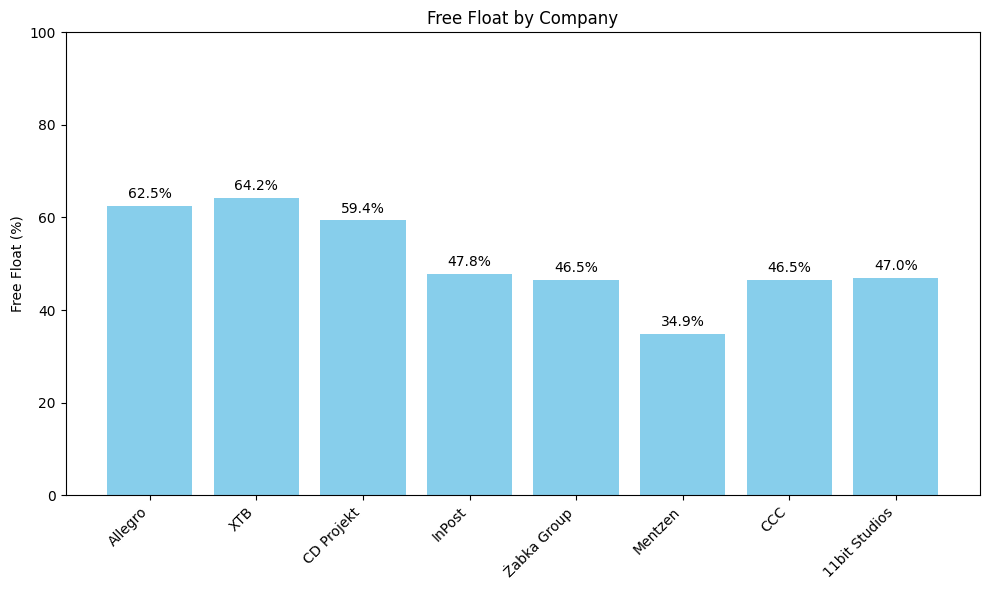

In [10]:
import matplotlib.pyplot as plt

data = [
    {"company": "Allegro", "free_float": 62.48},
    {"company": "XTB", "free_float": 64.22},
    {"company": "CD Projekt", "free_float": 59.42},
    {"company": "InPost", "free_float": 47.77},
    {"company": "Żabka Group", "free_float": 46.53},
    {"company": "Mentzen", "free_float": 34.93},
    {"company": "CCC", "free_float": 46.49},
    {"company": "11bit Studios", "free_float": 47.01},
]

# Extract for plotting
companies = [entry["company"] for entry in data]
free_floats = [entry["free_float"] for entry in data]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(companies, free_floats, color='skyblue')
plt.ylabel('Free Float (%)')
plt.title('Free Float by Company')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)

# Add value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [9]:
#STOCK DATA PROCESSING
companies_stock_data = {}
companies =  list(all_data['stock_company'].unique())

for company in companies:
    df = pd.read_csv(f'Stock_data/{company}.csv')
    df['Data'] = pd.to_datetime(df['Data'])
    df.sort_values(by = 'Data')

    # Calculate returns and other metrics
    df['Return'] = df['Zamkniecie'].pct_change()
    df['Same_day_return'] = (df['Zamkniecie'] - df['Otwarcie'])/ df['Otwarcie']
    df['Overnight_return'] = (df['Zamkniecie'] - df['Otwarcie'].shift(1))/ df['Zamkniecie']
    df['Change'] = df['Zamkniecie'] - df['Zamkniecie'].shift(1)

    df['Direction'] = df['Return'].apply(lambda x: 1 if x >0 else -1 )
    

    df['volatility'] = (
    (df['Najwyzszy'] - df['Najnizszy']) / df['Otwarcie']
    ).where(df['Otwarcie'] != 0, 0)

    
    # Create a complete date range from the minimum to maximum date in the dataset
    date_range = pd.date_range(start=df['Data'].min(), 
                          end=df['Data'].max(), 
                          freq='D')  
    
    # Reindex with complete date range
    df = df.set_index('Data').reindex(date_range).reset_index()
    df = df.rename(columns={'index': 'Date'})
    df['Date'] = pd.to_datetime(df['Date'], errors='raise')
    df['weekday'] = df['Date'].dt.day_name()
    df['company'] = company
    df['is_trading_day'] = df['Zamkniecie'].notna()
    companies_stock_data[company] = df

